# Problem 3

In [1]:
from scipy.integrate import trapz
from scipy.special import legendre
from scipy.optimize.zeros import newton
from numpy.polynomial.legendre import leggauss
import numpy as np
import matplotlib.pyplot as plt

Plot the 14th Legendre polynomial to eyeball the starting guesses for the zeros

In [2]:
x = np.linspace(-1, 1, 10000)

In [3]:
l = legendre(14)

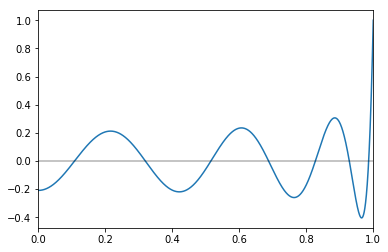

In [4]:
plt.plot(x, l(x))
plt.xlim(0, 1)
plt.axhline(y=0, alpha=0.3, color='black')

This has seven positive and seven negative zeros

In [5]:
guesses = [
    0.1,
    0.33,
    0.52,
    0.7,
    0.8,
    0.9,
    1.0
]

`newton` uses the Newton-Raphson method to find zeros of a function

In [6]:
zeros = np.array([newton(l, g) for g in guesses])
print(zeros)

[ 0.10805495  0.31911237  0.51524864  0.6872929   0.82720132  0.92843488
  0.98628381]


Now I can construct the matrix of integrals for $x^n$

Calculate the numerical integral of $x^n$ for even $n$'s

In [7]:
integrals = np.array([0.5*trapz(x**n, x) for n in range(15)[::2]])
print(integrals)

[ 1.          0.33333334  0.20000001  0.14285716  0.11111114  0.09090912
  0.07692312  0.06666671]


Create a matrix where each column $j$ and row $i$ is $\mu_j^{2i}$

In [8]:
functions = np.array([zeros**n for n in range(15)[::2]])

In [9]:
np.set_printoptions(precision=1)
print(functions)

[[  1.0e+00   1.0e+00   1.0e+00   1.0e+00   1.0e+00   1.0e+00   1.0e+00]
 [  1.2e-02   1.0e-01   2.7e-01   4.7e-01   6.8e-01   8.6e-01   9.7e-01]
 [  1.4e-04   1.0e-02   7.0e-02   2.2e-01   4.7e-01   7.4e-01   9.5e-01]
 [  1.6e-06   1.1e-03   1.9e-02   1.1e-01   3.2e-01   6.4e-01   9.2e-01]
 [  1.9e-08   1.1e-04   5.0e-03   5.0e-02   2.2e-01   5.5e-01   9.0e-01]
 [  2.2e-10   1.1e-05   1.3e-03   2.4e-02   1.5e-01   4.8e-01   8.7e-01]
 [  2.5e-12   1.1e-06   3.5e-04   1.1e-02   1.0e-01   4.1e-01   8.5e-01]
 [  3.0e-14   1.1e-07   9.3e-05   5.2e-03   7.0e-02   3.5e-01   8.2e-01]]


In [10]:
np.set_printoptions(precision=8)

Get the official values to compare with

In [11]:
mus, wts = leggauss(14)

Compare the official $\mu$ values (stored in the variable `mus`) to my calculated values (stored in `zeros`)

In [12]:
mus[7:]

array([ 0.10805495,  0.31911237,  0.51524864,  0.6872929 ,  0.82720132,
        0.92843488,  0.98628381])

In [13]:
zeros

array([ 0.10805495,  0.31911237,  0.51524864,  0.6872929 ,  0.82720132,
        0.92843488,  0.98628381])

Compare the official weights (stored in `wts`) to my calculated values (stored in `weights`)

In [14]:
wts[7:]

array([ 0.21526385,  0.20519846,  0.1855384 ,  0.15720317,  0.12151857,
        0.08015809,  0.03511946])

In [15]:
weights = np.linalg.inv(functions.T @ functions) @ functions.T @ integrals
weights

array([ 0.2152639 ,  0.20519833,  0.18553861,  0.15720292,  0.12151885,
        0.08015776,  0.03511963])

Calculate the fractional error between my calculated weights and the official ones

In [16]:
np.abs(weights - wts[7:]) / wts[7:]

array([  2.08311775e-07,   6.70460299e-07,   1.12400692e-06,
         1.56257606e-06,   2.33478854e-06,   4.08320243e-06,
         4.96419886e-06])

Pretty close! Within ~$10^{-4}$%